### Bar plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
tahoe_results = {}
replogle_results = {}

def plot_bar(values, groups, title='Model Comparison by Metric', save_path=None,
                      n_groups=5, figsize=(12, 6), legend=False, fontsize=22):
    """
    Plots a group grouped bar chart with predefined models, colors, and hatching.
    
    Parameters:
        values (ndarray): A 2 x N array of values (2 groups x number of models).
        groups (list): Names of the two groups (e.g., ['ROC-AUC', 'PR-AUC']).
        title (str): Plot title.
        save_path (str or None): Path to save the figure. If None, the figure is not saved.
    """
    fontsize = fontsize

    models = ['State-Sets', 'Pert Mean', 'Cell Type Mean', 'scVI', 'CPA', 'scGPT']
    models = models[:n_groups]
    
    n_groups = len(groups)
    n_models = len(models)

    # Color and hatch maps
    color_map = {
        'State-Sets': 'royalblue',
        'Pert Mean': 'goldenrod',
        'Cell Type Mean': 'goldenrod',
        'scVI': 'gray',
        'CPA': 'gray'
    }
    hatch_map = {
        'State-Sets': None,
        'Pert Mean': '/',
        'Cell Type Mean': '\\',
        'scVI': '/',
        'CPA': '\\'
    }

    bar_colors = [color_map.get(model, 'gray') for model in models]
    bar_hatches = [hatch_map.get(model, '') for model in models]

    bar_width = 0.12
    group_spacing = 0.3
    index = np.arange(n_groups) * (n_models * bar_width + group_spacing)

    plt.figure(figsize=figsize)
    
    for i, model in enumerate(models):
        plt.bar(index + i * bar_width,
                values[:, i],
                bar_width,
                label=model,
                color=bar_colors[i],
                hatch=bar_hatches[i],
                edgecolor='black',
                linewidth=1.2)

    plt.xlabel('', fontsize=fontsize)
    #plt.ylabel('Score', fontsize=fontsize)
    plt.title('', fontsize=fontsize)
    plt.xticks(index + bar_width * (n_models - 1) / 2, groups, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    if legend:
        plt.legend(fontsize=fontsize - 2, bbox_to_anchor=[1.0, 0.8])
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.ylim([0,1.1])

    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.show()


### Embedding qualty plots

In [2]:
import pandas as pd

data = [
    # Fewshot block
    ['replogle', 'pertmean', 'fewshot', 0.5161, 0.0743],
    ##['replogle', 'hvg', 'fewshot', 0.6976, 0.1661],
    ['replogle', 'hvg_pretrained', 'fewshot', 0.71, 0.1618],
    ##['replogle', 'vci', 'fewshot', 0.6882, 0.1765],
    ['replogle', 'vci_pretrained', 'fewshot', 0.706, 0.2043],
    
    ['jiang', 'pertmean', 'fewshot', 0.0497, 0.0243],
    ##['jiang', 'hvg', 'fewshot', 0.5, 0.061],
    ['jiang', 'hvg_pretrained', 'fewshot', 0.22, 0.047],
    ##['jiang', 'vci', 'fewshot', 0.24, 0.043],
    ['jiang', 'vci_pretrained', 'fewshot', 0.33, 0.0656],
    
    ['srivatsan', 'pertmean', 'fewshot', 0.0251, 0.0415],
    ##['srivatsan', 'hvg', 'fewshot', 0.6667, 0.1931],
    ['srivatsan', 'hvg_pretrained', 'fewshot', 0.6312, 0.1295],
    ##['srivatsan', 'vci', 'fewshot', 0.3383, 0.093],
    ['srivatsan', 'vci_pretrained', 'fewshot', 0.691, 0.2365],
    
    ['mcfaline', 'pertmean', 'fewshot', -0.0803, 0.0064],
    ##['mcfaline', 'hvg', 'fewshot', 0.082, 0.0074],
    ['mcfaline', 'hvg_pretrained', 'fewshot', 0.0649, 0.0119],
    ##['mcfaline', 'vci', 'fewshot', 0.0819, 0.0099],
    ['mcfaline', 'vci_pretrained', 'fewshot', 0.104, 0.0124],

    ['pbmc', 'pertmean', 'fewshot', 0.117, None],
    ['pbmc', 'hvg_pretrained', 'fewshot', 0.772, None],
    ['pbmc', 'vci_pretrained', 'fewshot', 0.772, None],
    
    # Zeroshot block
    ['replogle', 'pertmean', 'zeroshot', 0.5008, 0.0756],
    ##['replogle', 'hvg', 'zeroshot', 0.61, 0.104],
    ['replogle', 'hvg_pretrained', 'zeroshot', 0.48, 0.1],
    ##['replogle', 'vci', 'zeroshot', 0.596, 0.0965],
    ['replogle', 'vci_pretrained', 'zeroshot', 0.554, 0.097],
    
    ['jiang', 'pertmean', 'zeroshot', -0.1366, 0.0244],
    ##['jiang', 'hvg', 'zeroshot', 0.226, 0.059],
    ['jiang', 'hvg_pretrained', 'zeroshot', 0.127, 0.036],
    ##['jiang', 'vci', 'zeroshot', -0.065, 0.046],
    ['jiang', 'vci_pretrained', 'zeroshot', 0.3508, 0.05],

    ['srivatsan', 'pertmean', 'zeroshot', 0.0904, 0.0473],
    ##['srivatsan', 'hvg', 'zeroshot', 0.1828, 0.0745],
    ['srivatsan', 'hvg_pretrained', 'zeroshot', 0.1918, 0.0624],
    ##['srivatsan', 'vci', 'zeroshot', 0.104, 0.079],
    ['srivatsan', 'vci_pretrained', 'zeroshot', 0.3673, 0.0788],

    ['mcfaline', 'pertmean', 'zeroshot', 0.028, 0.004],
    ##['mcfaline', 'hvg', 'zeroshot', -0.0007, 0.009],
    ['mcfaline', 'hvg_pretrained', 'zeroshot', -0.082, 0.007],
    ##['mcfaline', 'vci', 'zeroshot', 0.042, 0.008],
    ['mcfaline', 'vci_pretrained', 'zeroshot', 0.189, 0.004],

    ['pbmc', 'pertmean', 'zeroshot', 0.013, None],
    ['pbmc', 'hvg_pretrained', 'zeroshot', 0.674, None],
    ['pbmc', 'vci_pretrained', 'zeroshot', 0.788, None],

    ['feng', 'pertmean', 'zeroshot', -0.1604, 0.117],
    ['feng', 'hvg', 'zeroshot', 0.328, 0.0009],
    ['feng', 'vci', 'zeroshot', 0.3638, 0.1169],
    ['feng', 'vci_pretrained', 'zeroshot', 0.1027, 0.0762],
]

df = pd.DataFrame(data, columns=['dataset', 'model', 'setting', 'de_spearman_sig', 'precision_at_N'])
df = df[~df['dataset'].isin(['feng'])]

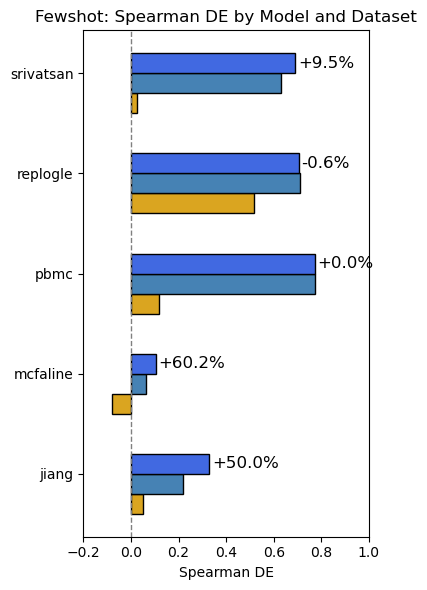

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


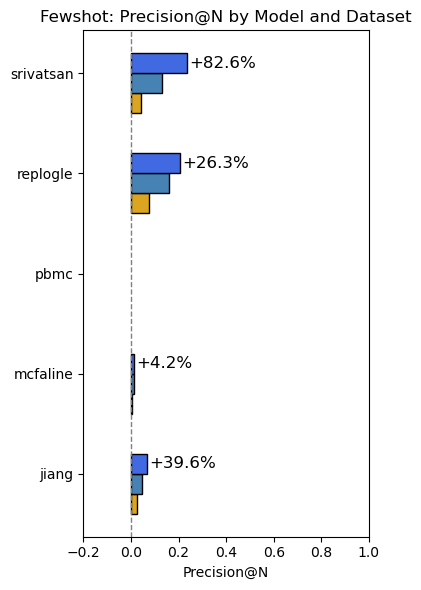

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define consistent model order
model_order = ['pertmean', 'hvg_pretrained', 'vci_pretrained']

# Filter for fewshot and sort model order
df_fewshot = df[df['setting'] == 'fewshot'].copy()
df_fewshot['model'] = pd.Categorical(df_fewshot['model'], categories=model_order, ordered=True)
df_fewshot.sort_values(by=['dataset', 'model'], inplace=True)

# Pivot data for plotting
spearman_pivot = df_fewshot.pivot(index='dataset', columns='model', values='de_spearman_sig')[model_order]
precision_pivot = df_fewshot.pivot(index='dataset', columns='model', values='precision_at_N')[model_order]

# Grouped horizontal bar plot with overlapping vci and vci_pretrained
def plot_custom_grouped_barh(data, xlabel, title, savefile):
    datasets = data.index
    bar_height = 0.2
    x = np.arange(len(datasets))
    
    fig, ax = plt.subplots(figsize=(4, 6))

    # Offsets for bar positions
    offsets = {
        'pertmean': -1.5 * bar_height,
        'hvg_pretrained': -0.5 * bar_height,
        'vci_pretrained': 0.5 * bar_height
    }

    # Colors
    colors = {
        'pertmean': 'goldenrod',
        'hvg_pretrained': '#4682B4',  # steel blue
        'vci_pretrained': 'royalblue',
    }

    for model in model_order:
        bar_positions = x + offsets[model]
        bars = ax.barh(bar_positions, data[model], height=bar_height,
                       label=model, color=colors[model], edgecolor='black')

        # Annotate improvement % for vci_pretrained over hvg_pretrained
        if model == 'vci_pretrained':
            for i, dataset in enumerate(datasets):
                vci_val = data.loc[dataset, 'vci_pretrained']
                hvg_val = data.loc[dataset, 'hvg_pretrained']
                if hvg_val != 0:
                    improvement_pct = 100 * (vci_val - hvg_val) / abs(hvg_val)
                    text = f"{improvement_pct:+.1f}%"
                    ax.text(vci_val + 0.01, x[i] + offsets[model],
                            text, va='center', ha='left', fontsize=12, color='black')

    # Add vertical line at x = 0
    ax.axvline(x=0, color='gray', linestyle='--', linewidth=1)

    ax.set_yticks(x)
    ax.set_yticklabels(datasets)
    ax.set_xlabel(xlabel)
    ax.set_xlim([-0.2, 1.0])
    ax.set_title(title)
    plt.tight_layout()
    plt.savefig(savefile, dpi=300, bbox_inches='tight')
    plt.show()



# Plot both metrics and save
plot_custom_grouped_barh(spearman_pivot, xlabel='Spearman DE', title='Fewshot: Spearman DE by Model and Dataset', savefile='fewshot_spearman.svg')
plot_custom_grouped_barh(precision_pivot, xlabel='Precision@N', title='Fewshot: Precision@N by Model and Dataset', savefile='fewshot_precision.svg')


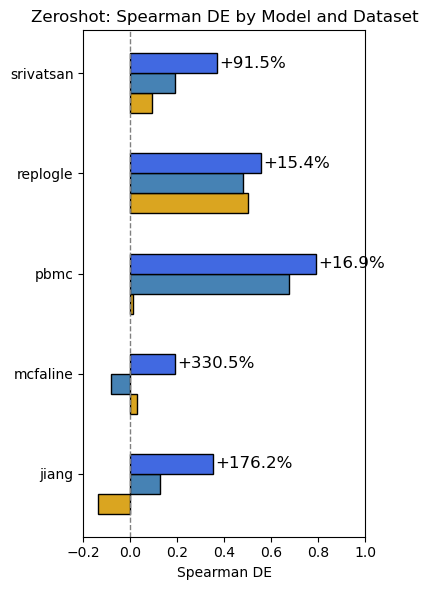

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


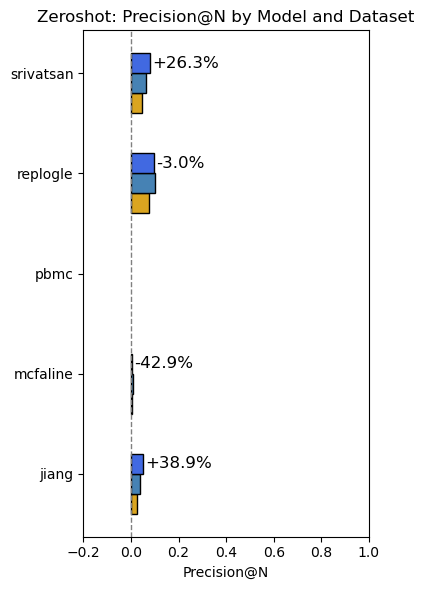

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define consistent model order
model_order = ['pertmean', 'hvg_pretrained', 'vci_pretrained']

# Filter for zeroshot and sort model order
df_zeroshot = df[df['setting'] == 'zeroshot'].copy()
df_zeroshot['model'] = pd.Categorical(df_zeroshot['model'], categories=model_order, ordered=True)
df_zeroshot.sort_values(by=['dataset', 'model'], inplace=True)

# Pivot data for plotting
spearman_pivot = df_zeroshot.pivot(index='dataset', columns='model', values='de_spearman_sig')[model_order]
precision_pivot = df_zeroshot.pivot(index='dataset', columns='model', values='precision_at_N')[model_order]

# Grouped horizontal bar plot with overlapping vci and vci_pretrained
def plot_custom_grouped_barh(data, xlabel, title, savefile):
    datasets = data.index
    bar_height = 0.2
    x = np.arange(len(datasets))
    
    fig, ax = plt.subplots(figsize=(4, 6))

    # Offsets for bar positions
    offsets = {
        'pertmean': -1.5 * bar_height,
        'hvg_pretrained': -0.5 * bar_height,
        'vci_pretrained': 0.5 * bar_height
    }

    # Colors
    colors = {
        'pertmean': 'goldenrod',
        'hvg_pretrained': '#4682B4',  # steel blue
        'vci_pretrained': 'royalblue',
    }

    for model in model_order:
        bar_positions = x + offsets[model]
        bars = ax.barh(bar_positions, data[model], height=bar_height,
                       label=model, color=colors[model], edgecolor='black')

        # Annotate improvement % for vci_pretrained over hvg_pretrained
        if model == 'vci_pretrained':
            for i, dataset in enumerate(datasets):
                vci_val = data.loc[dataset, 'vci_pretrained']
                hvg_val = data.loc[dataset, 'hvg_pretrained']
                if hvg_val != 0:
                    improvement_pct = 100 * (vci_val - hvg_val) / abs(hvg_val)
                    text = f"{improvement_pct:+.1f}%"
                    ax.text(vci_val + 0.01, x[i] + offsets[model],
                            text, va='center', ha='left', fontsize=12, color='black')

    # Add vertical line at x = 0
    ax.axvline(x=0, color='gray', linestyle='--', linewidth=1)

    ax.set_yticks(x)
    ax.set_yticklabels(datasets)
    ax.set_xlabel(xlabel)
    ax.set_xlim([-0.2, 1.0])
    ax.set_title(title)
    plt.tight_layout()
    plt.savefig(savefile, dpi=300, bbox_inches='tight')
    plt.show()



# Plot both metrics and save
plot_custom_grouped_barh(spearman_pivot, xlabel='Spearman DE', title='Zeroshot: Spearman DE by Model and Dataset', savefile='zeroshot_spearman.svg')
plot_custom_grouped_barh(precision_pivot, xlabel='Precision@N', title='Zeroshot: Precision@N by Model and Dataset', savefile='zeroshot_precision.svg')


### Overlapping bar plots

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define consistent model order
model_order = ['pertmean', 'hvg', 'vci', 'vci_pretrained']

# Filter for fewshot and sort model order
df_fewshot = df[df['setting'] == 'fewshot'].copy()
df_fewshot['model'] = pd.Categorical(df_fewshot['model'], categories=model_order, ordered=True)
df_fewshot.sort_values(by=['dataset', 'model'], inplace=True)

# Pivot data for plotting
spearman_pivot = df_fewshot.pivot(index='dataset', columns='model', values='de_spearman_sig')[model_order]
precision_pivot = df_fewshot.pivot(index='dataset', columns='model', values='precision_at_N')[model_order]

# Grouped horizontal bar plot with overlapping vci and vci_pretrained
def plot_custom_grouped_barh(data, xlabel, title, savefile):
    datasets = data.index
    bar_height = 0.2
    overlap_height = 0.2
    x = np.arange(len(datasets))
    
    fig, ax = plt.subplots(figsize=(4, 5))

    # Offsets for bar positions
    offsets = {
        'pertmean': -1.5 * bar_height,
        'hvg': -0.5 * bar_height,
        'vci': 0.5 * bar_height,
        'vci_pretrained': 0.5 * bar_height  # overlap with vci
    }

    # Colors
    colors = {
        'pertmean': 'goldenrod',
        'hvg': '#4682B4',  # steel blue
        'vci': 'royalblue',
        'vci_pretrained': (65/255, 105/255, 225/255, 0.5)  # semi-transparent royal blue
    }

    for model in model_order:
        bar_positions = x + offsets[model]
        ax.barh(bar_positions, data[model], height=overlap_height if 'vci' in model else bar_height,
                label=model, color=colors[model], edgecolor='black')

    ax.set_yticks(x)
    ax.set_yticklabels(datasets)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    plt.tight_layout()
    plt.savefig(savefile, dpi=300, bbox_inches='tight')
    plt.show()

# Plot both metrics and save
plot_custom_grouped_barh(spearman_pivot, xlabel='Spearman DE', title='Fewshot: Spearman DE by Model and Dataset', savefile='fewshot_spearman.svg')
plot_custom_grouped_barh(precision_pivot, xlabel='Precision@N', title='Fewshot: Precision@N by Model and Dataset', savefile='fewshot_precision.svg')


KeyError: "['hvg', 'vci'] not in index"

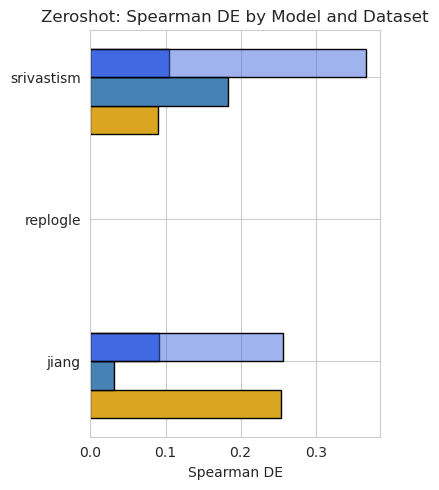

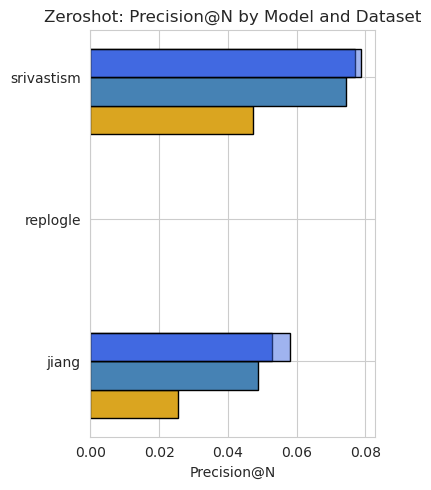

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define consistent model order
model_order = ['pertmean', 'hvg', 'vci', 'vci_pretrained']

# Filter for zeroshot and sort model order
df_zeroshot = df[df['setting'] == 'zeroshot'].copy()
df_zeroshot['model'] = pd.Categorical(df_zeroshot['model'], categories=model_order, ordered=True)
df_zeroshot.sort_values(by=['dataset', 'model'], inplace=True)

# Pivot data for plotting
spearman_pivot = df_zeroshot.pivot(index='dataset', columns='model', values='de_spearman_sig')[model_order]
precision_pivot = df_zeroshot.pivot(index='dataset', columns='model', values='precision_at_N')[model_order]

# Grouped horizontal bar plot with overlapping vci and vci_pretrained
def plot_custom_grouped_barh(data, xlabel, title, savefile):
    datasets = data.index
    bar_height = 0.2
    overlap_height = 0.2
    x = np.arange(len(datasets))
    
    fig, ax = plt.subplots(figsize=(4, 5))

    # Offsets for bar positions
    offsets = {
        'pertmean': -1.5 * bar_height,
        'hvg': -0.5 * bar_height,
        'vci': 0.5 * bar_height,
        'vci_pretrained': 0.5 * bar_height  # overlap with vci
    }

    # Colors
    colors = {
        'pertmean': 'goldenrod',
        'hvg': '#4682B4',  # steel blue
        'vci': 'royalblue',
        'vci_pretrained': (65/255, 105/255, 225/255, 0.5)  # semi-transparent royal blue
    }

    for model in model_order:
        bar_positions = x + offsets[model]
        ax.barh(bar_positions, data[model], height=overlap_height if 'vci' in model else bar_height,
                label=model, color=colors[model], edgecolor='black')

    ax.set_yticks(x)
    ax.set_yticklabels(datasets)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    plt.tight_layout()
    plt.savefig(savefile, dpi=300, bbox_inches='tight')
    plt.show()

# Plot both metrics and save
plot_custom_grouped_barh(spearman_pivot, xlabel='Spearman DE', title='Zeroshot: Spearman DE by Model and Dataset', savefile='zeroshot_spearman.svg')
plot_custom_grouped_barh(precision_pivot, xlabel='Precision@N', title='Zeroshot: Precision@N by Model and Dataset', savefile='zeroshot_precision.svg')


### Intrinsic-Exreinisc

In [88]:
data = {
    "srivatsan-A549": {
        "INTRINSIC": {
            "HVG": 0.7519,
            #"pca": 0.7649,
            "scFoundation": 0.6395,
            "scGPT": 0.6322,
            "TF": 0.6812,
            "UCE": 0.6477,
            "State": 0.7535,
        },
        "EXTRINSIC": {
            "HVG": 0.6405,
            #"pca": 0.6698,
            "scFoundation": 0.6241,
            "scGPT": 0.6113,
            "TF": 0.6421,
            "UCE": 0.6214,
            "State": 0.6612,
        },
    },
    "srivatsan-MCF7": {
        "INTRINSIC": {
            "HVG": 0.6483,
            #"pca": 0.7013,
            "scFoundation": 0.5736,
            "scGPT": 0.5616,
            "TF": 0.6007,
            "UCE": 0.5746,
            "State": 0.6904,
        },
        "EXTRINSIC": {
            "HVG": 0.5443,
            #"pca": 0.5772,
            "scFoundation": 0.5401,
            "scGPT": 0.5679,
            "TF": 0.5367,
            "UCE": 0.5676,
            "State": 0.5774,
        },
    },
    "srivatsan-K562": {
        "INTRINSIC": {
            "HVG": 0.6111,
            #"pca": 0.6037,
            "scFoundation": 0.5334,
            "scGPT": 0.516,
            "TF": 0.5406,
            "UCE": 0.5595,
            "State": 0.6082,
        },
        "EXTRINSIC": {
            "HVG": 0.533,
            #"pca": 0.5497,
            "scFoundation": 0.5166,
            "scGPT": 0.5077,
            "TF": 0.5154,
            "UCE": 0.5603,
            "State": 0.5564,
        },
    },
    "replogle-hepg2": {
        "INTRINSIC": {
            "HVG": 0.8116,
            "scFoundation": 0.7827,
            "scGPT": 0.7247,
            "TF": 0.7904,
            "UCE": 0.7147,
            "State": 0.822,
        },
        "EXTRINSIC": {
            "HVG": 0.6511,
            "scFoundation": 0.6889,
            "scGPT": 0.6767,
            "TF": 0.6447,
            "UCE": 0.67,
            "State": 0.6964,
        },
    },
    "replogle-jurkat": {
        "INTRINSIC": {
            "HVG": 0.8095,
            "scFoundation": 0.7833,
            "scGPT": 0.7363,
            "TF": 0.827,
            "UCE": 0.7037,
            "State": 0.8337,
        },
        "EXTRINSIC": {
            "HVG": 0.6187,
            "scFoundation": 0.6937,
            "scGPT": 0.6843,
            "TF": 0.6503,
            "UCE": 0.6668,
            "State": 0.7016,
        },
    },
    "replogle-rpe1": {
        "INTRINSIC": {
            "HVG": 0.8855,
            "scFoundation": 0.8768,
            "scGPT": 0.782,
            "TF": 0.8723,
            "UCE": 0.7687,
            "State": 0.9121,
        },
        "EXTRINSIC": {
            "HVG": 0.6602,
            "scFoundation": 0.7173,
            "scGPT": 0.6859,
            "TF": 0.6574,
            "UCE": 0.6689,
            "State": 0.6942,
        },
    },
    "replogle-k562": {
        "INTRINSIC": {
            "HVG": 0.8261,
            "scFoundation": 0.807,
            "scGPT": 0.7396,
            "TF": 0.8513,
            "UCE": 0.7089,
            "State": 0.8467,
        },
        "EXTRINSIC": {
            "HVG": 0.6427,
            "scFoundation": 0.7097,
            "scGPT": 0.6998,
            "TF": 0.6501,
            "UCE": 0.6792,
            "State": 0.7199,
        },
    },
}


In [89]:
import pandas as pd
def normalize_dict(dict_, norm_key='HVG'):

    # Convert to DataFrame for easy normalization
    df = pd.DataFrame({'Label': dict_})
    
    # Normalize to HVG
    df_normalized = df / df.loc[norm_key]
    
    _norm = df_normalized.loc[:, 'Label'].to_dict()

    return _norm

In [90]:
data_norm = {
    "srivatsan-A549": {'INTRINSIC': normalize_dict(data['srivatsan-A549']['INTRINSIC']), 
             'EXTRINSIC': normalize_dict(data['srivatsan-A549']['EXTRINSIC'])},
    "srivatsan-MCF7": {'INTRINSIC': normalize_dict(data['srivatsan-MCF7']['INTRINSIC']), 
             'EXTRINSIC': normalize_dict(data['srivatsan-MCF7']['EXTRINSIC'])},
    "srivatsan-K562": {'INTRINSIC': normalize_dict(data['srivatsan-K562']['INTRINSIC']), 
             'EXTRINSIC': normalize_dict(data['srivatsan-K562']['EXTRINSIC'])},
    "replogle-k562": {'INTRINSIC': normalize_dict(data['replogle-k562']['INTRINSIC']), 
             'EXTRINSIC': normalize_dict(data['replogle-k562']['EXTRINSIC'])},
    "replogle-k562": {'INTRINSIC': normalize_dict(data['replogle-rpe1']['INTRINSIC']), 
             'EXTRINSIC': normalize_dict(data['replogle-k562']['EXTRINSIC'])},
    "replogle-k562": {'INTRINSIC': normalize_dict(data['replogle-hepg2']['INTRINSIC']), 
             'EXTRINSIC': normalize_dict(data['replogle-k562']['EXTRINSIC'])},
    "replogle-k562": {'INTRINSIC': normalize_dict(data['replogle-jurkat']['INTRINSIC']), 
             'EXTRINSIC': normalize_dict(data['replogle-k562']['EXTRINSIC'])},
}

In [87]:
import matplotlib.pyplot as plt

x = [extrinsic_norm[k] for k in intrinsic_norm.keys()]
y = [intrinsic_norm[k] for k in intrinsic_norm.keys()]
labels = list(intrinsic.keys())

colors = []
for label in labels:
    if label == 'HVG':
        colors.append('goldenrod')
    elif label == 'State':
        colors.append('royalblue')
    else:
        colors.append('black')

plt.figure(figsize=(7, 5))
plt.scatter(x, y, marker='x', c=colors)

for xi, yi, label in zip(x, y, labels):
    plt.annotate(label, (xi, yi), textcoords="offset points", xytext=(5,5), ha='left', fontsize=15)

plt.axhline(y=intrinsic_norm['HVG'], color='goldenrod', linestyle='--', linewidth=1)
plt.axvline(x=extrinsic_norm['HVG'], color='goldenrod', linestyle='--', linewidth=1)

plt.xlabel("Extrinsic", fontsize=15)
plt.ylabel("Intrinsic", fontsize=15)
plt.title("Extrinsic vs Intrinsic Scatter Plot", fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Add space above top y-value
y_max = max(y)
y_range = y_max - min(y)
plt.ylim(top=y_max + 0.1 * y_range)

#plt.savefig('embedding_quality.svg')
plt.tight_layout()
plt.show()


NameError: name 'intrinsic' is not defined

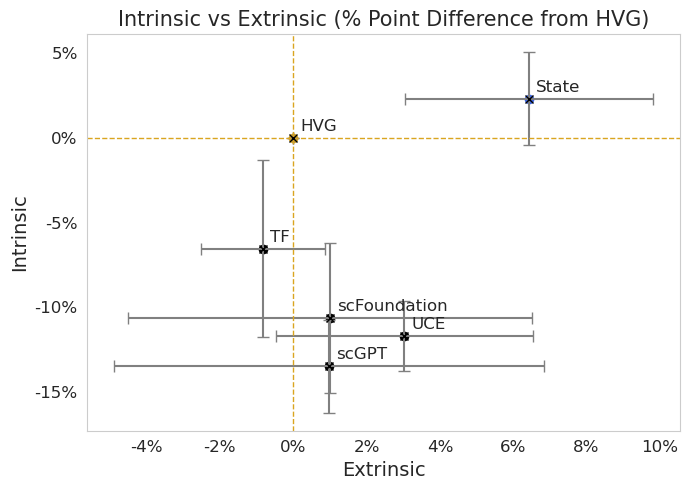

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter

norms = data_norm

# Compute means and stds across cell lines
methods = norms["srivatsan-A549"]["INTRINSIC"].keys()
intrinsic_vals = {k: [norms[cell]["INTRINSIC"][k] for cell in norms] for k in methods}
extrinsic_vals = {k: [norms[cell]["EXTRINSIC"][k] for cell in norms] for k in methods}

# Reference values (HVG)
intrinsic_ref = np.mean(intrinsic_vals['HVG'])
extrinsic_ref = np.mean(extrinsic_vals['HVG'])

# Percent point difference relative to HVG
intrinsic_norm = {k: 100 * (np.mean(intrinsic_vals[k]) - intrinsic_ref) for k in methods}
extrinsic_norm = {k: 100 * (np.mean(extrinsic_vals[k]) - extrinsic_ref) for k in methods}
intrinsic_err = {k: 100 * np.std(intrinsic_vals[k]) for k in methods}
extrinsic_err = {k: 100 * np.std(extrinsic_vals[k]) for k in methods}

# Plot points
x = [extrinsic_norm[k] for k in methods]
y = [intrinsic_norm[k] for k in methods]
xerr = [extrinsic_err[k] for k in methods]
yerr = [intrinsic_err[k] for k in methods]
labels = list(methods)

# Colors
colors = []
for label in labels:
    if label == 'HVG':
        colors.append('goldenrod')
    elif label == 'State':
        colors.append('royalblue')
    else:
        colors.append('black')

# Formatter for % tick labels
percent_formatter = FuncFormatter(lambda x, _: f"{x:.0f}%")

# Plot
plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='x', ecolor='gray', capsize=4, color='black')

# Plot points and labels
for xi, yi, label, color in zip(x, y, labels, colors):
    plt.scatter(xi, yi, color=color)
    plt.annotate(label, (xi, yi), textcoords="offset points", xytext=(5, 5), ha='left', fontsize=12)

# Reference lines at (0,0)
plt.axhline(y=0, color='goldenrod', linestyle='--', linewidth=1)
plt.axvline(x=0, color='goldenrod', linestyle='--', linewidth=1)

# Labels and formatting
plt.xlabel("Extrinsic", fontsize=14)
plt.ylabel("Intrinsic", fontsize=14)
plt.title("Intrinsic vs Extrinsic (% Point Difference from HVG)", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().xaxis.set_major_formatter(percent_formatter)
plt.gca().yaxis.set_major_formatter(percent_formatter)

plt.tight_layout()
plt.grid(False)
plt.savefig('intrinsic_extrinsic_diff_from_hvg.svg')
plt.show()


### Transcriptome-wide plot

In [4]:
import pandas as pd

In [5]:
read_df = pd.read_csv('/home/aadduri/pert-sets/notebooks/srivatsan_experiments_metrics.csv')

In [6]:
read_df = read_df[read_df['model'] != 'VCI_1.4.4']

In [7]:
read_df['metric'].unique()

array(['DE_patk_pval_fc_av_200', 'DE_pval_fc_avg_N',
       'DE_sig_genes_spearman', 'clustering_agreement',
       'pearson_delta_cell_type', 'perturbation_score', 'pr_auc',
       'roc_auc', 'spearman'], dtype=object)

In [8]:
plot_dict = {}
sel_metrics = ['perturbation_score', 'pearson_delta_cell_type', 'DE_pval_fc_avg_N', 'spearman', 'DE_sig_genes_spearman']

for m in sel_metrics:
    plot_dict[m] = read_df[read_df['metric'] == m].loc[:, ['model', 'metric_value']].set_index('model').to_dict()


In [9]:
plot_dict['perturbation_score']['metric_value']

{'All': 0.6341815967160064,
 'HVG': 0.6315917504112787,
 'PCA': 0.5961602932451058,
 'UCE': 0.5996652214076491,
 'VCI_1.4.2': 0.6272515754132687,
 'scFoundation': 0.5466924660933427,
 'scGPT': 0.5358805014264779}

In [11]:
# Convert to DataFrame
df = pd.DataFrame(data)

# Compute ranks (higher value = better rank, so we rank in descending order)
ranks = df.rank(ascending=False, axis=0)

# Compute average rank across plots
avg_ranks = ranks.mean(axis=1).sort_values()

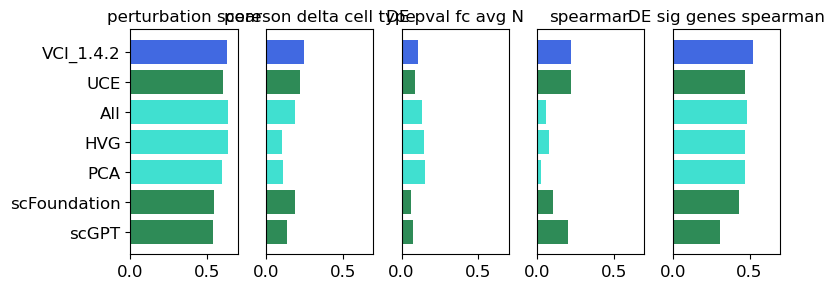

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Construct DataFrame from nested plot_dict
data = {
    'perturbation_score': plot_dict['perturbation_score']['metric_value'],
    'pearson_delta_cell_type': plot_dict['pearson_delta_cell_type']['metric_value'],
    'DE_pval_fc_avg_N': plot_dict['DE_pval_fc_avg_N']['metric_value'],
    'spearman': plot_dict['spearman']['metric_value'],
    'DE_sig_genes_spearman': plot_dict['DE_sig_genes_spearman']['metric_value']
}

df = pd.DataFrame(data)

# Compute ranks (higher = better)
ranks = df.rank(ascending=False, axis=0)
avg_ranks = ranks.mean(axis=1)
df['avg_rank'] = avg_ranks

# Sort models by average rank (best = top)
df_sorted = df.sort_values('avg_rank', ascending=False)

# Drop avg_rank for plotting
df_plot = df_sorted.drop(columns='avg_rank')

# Define colors
def get_color(model):
    if model in ['HVG', 'PCA', 'All']:
        return 'turquoise'
    elif model == 'VCI_1.4.2':
        return 'royalblue'
    else:
        return 'seagreen'

colors = {model: get_color(model) for model in df_plot.index}

# Plot
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(8, 3), sharex=True)

x_max = df_plot.values.max() * 1.1  # consistent x-axis limit

for i, (ax, (metric, values)) in enumerate(zip(axes, df_plot.items())):
    model_names = values.index
    model_scores = values.values
    bar_colors = [colors[model] for model in model_names]

    ax.barh(model_names, model_scores, color=bar_colors)
    ax.set_title(metric.replace('_', ' '), fontsize=12)
    ax.set_xlim(0, x_max)
    ax.tick_params(axis='both', labelsize=12)

    if i != 0:
        ax.set_yticklabels([])  # remove y-axis labels except on first plot
        ax.tick_params(axis='y', length=0)  # remove y-tick lines

plt.tight_layout()
plt.savefig('bars.svg')
plt.show()


### Downsampling figure

In [83]:
downsample_values = [1.0, 0.92, 0.87, 0.82, 0.71]
state_sets_values = [0.47, 0.48, 0.46, 0.48, 0.45]

labels = [1.0, 0.8, 0.6, 0.4, 0.2]


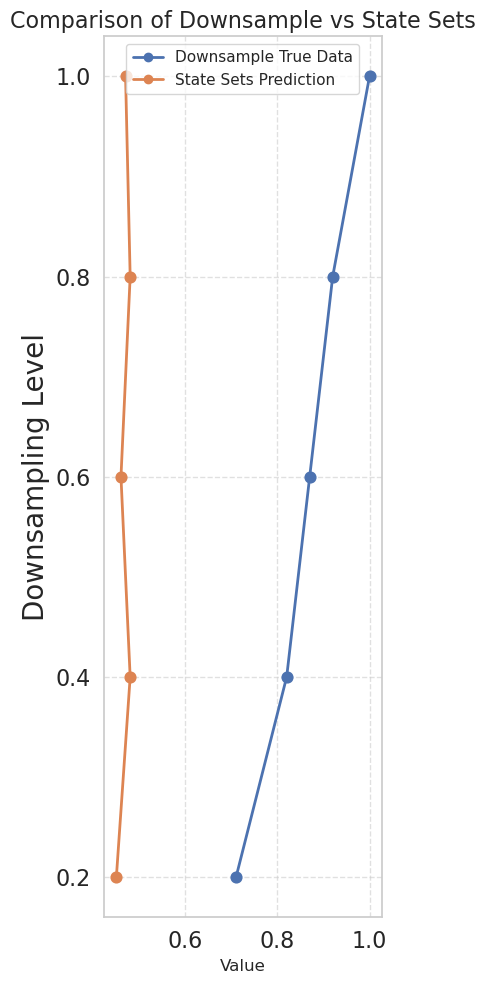

In [97]:
import matplotlib.pyplot as plt

downsample_values = [1.0, 0.92, 0.87, 0.82, 0.71]
state_sets_values = [0.47, 0.48, 0.46, 0.48, 0.45]
labels = [1.0, 0.8, 0.6, 0.4, 0.2]

# Slim and tall figure
plt.figure(figsize=(4, 10))

# Set positions for each label
y_positions = list(range(len(labels)))

# Plot values
plt.plot(downsample_values, y_positions, marker='o', label='Downsample True Data', linewidth=2)
plt.plot(state_sets_values, y_positions, marker='o', label='State Sets Prediction', linewidth=2)

# Scatter overlay
plt.scatter(downsample_values, y_positions, s=60)
plt.scatter(state_sets_values, y_positions, s=60)

# Set y-axis ticks and invert
plt.yticks(ticks=y_positions, labels=labels, fontsize=16)
plt.xticks(fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis so 1.0 is at the top

# Labels and style
plt.xlabel("Value")
plt.ylabel("Downsampling Level", fontsize=20)
plt.title("Comparison of Downsample vs State Sets", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.savefig('downsampling_plot.svg')
plt.show()


### Plot zero shot performance for Parse

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from plot import plot_bar, plot_bar_scatter, plot_bar_scatter_hor, plot_bar_scatter_hor_embed_compare
import glob
import pandas as pd

from pathlib import Path

def get_metric(files, metric_name, return_type=None):
    try:
        vals = [pd.read_csv(f)[metric_name].mean() for f in files]
    except:
        return np.nan
    if return_type=='mean':
        return np.mean(vals)
    if return_type=='std':
        return np.std(vals)
    else:
        return vals

def mean_sd(values):
    return np.mean(values)

model_key_to_name={
 'state-sets': 'State-Sets',
 'sets': 'Sets',
 'pert_mean': 'Pert Mean',
 'cell_mean': 'Cell Type Mean',
 'lrlm': 'Linear',
 'scvi': 'scVI',
 'cpa': 'CPA',
 'scgpt': 'scGPT'
}


In [2]:
import matplotlib.pyplot as plt

def plotter_function(files, fname='test.svg'):

    # ------------------------------------------------------------------
    values_dict = {}
    err_dict = {}
    titles_dict = {}
    outpaths_dict = {}
    groups_dict = {}
    cell_vals_dict = {}
    
    keys        = ['state-sets', 'sets', 'pert_mean']
    model_names = [model_key_to_name[k] for k in keys]
    
    # helper for NaN-safe transforms
    def safe_apply(arr, fn):
        """Apply fn element-wise, converting NaNs to 0."""
        return [fn(x) if not np.isnan(x) else 0 for x in arr]
    
    # ------------------------------------------------------------------
    # one row per metric: (internal key, display title, output file, metric_name,
    #                     val_transform, err_transform)
    metrics = [
        ('Discrimination',   'Perturbation Discrimination', 'pert_discrim.svg',
         'discrimination_score_l1',
         lambda v: 1 - 2*v, lambda e: 2*e),
    
        ('Correlation',      'Pearson Correlation',         'pearson_corr.svg',
         'pearson_delta',
         lambda v: v,        lambda e: e),
    
        ('DE_Overlap',       'DE Genes Overlap (N)',        'de_overlap.svg',
         'overlap_at_N',
         lambda v: v,        lambda e: e),
    
        ('log fold change',  'Log fold change',             'logFC.svg',
         'de_spearman_lfc_sig',
         lambda v: v,        lambda e: e),
    
        ('Effect Sizes',     'Effect Sizes',                'effect_sizes.svg',
         'de_spearman_sig',
         lambda v: v,        lambda e: e),

        ('AUPRC',     'AUPRC',                'auprc.svg',
         'pr_auc',
         lambda v: v,        lambda e: e),
    ]
    
    # ------------------------------------------------------------------
    # populate the dicts
    for metric_title, disp_title, outpath, metric_name, v_tf, e_tf in metrics:
        titles_dict[metric_title]  = disp_title
        outpaths_dict[metric_title] = outpath
        groups_dict[metric_title]   = [disp_title]
    
        # raw means / stds
        raw_vals = [get_metric(files[k], metric_name, 'mean') for k in keys]
        raw_errs = [get_metric(files[k], metric_name, 'std')  for k in keys]
        raw_cell_vals = [get_metric(files[k], metric_name)  for k in keys]
    
        # transform & NaN-guard
        vals = safe_apply(raw_vals, v_tf)
        errs = safe_apply(raw_errs, e_tf)
        raw_cell_vals = [safe_apply(cv, v_tf) for cv in raw_cell_vals]
        
    
        # shape as (1, N) for downstream plotting code
        values_dict[metric_title] = np.expand_dims(vals, 1).T
        err_dict[metric_title]    = np.expand_dims(errs, 1).T
        cell_vals_dict[metric_title]    = raw_cell_vals

    metric_titles = list(values_dict.keys())
    n = len(metric_titles)
    fig, axes = plt.subplots(1, n, figsize=(3 * n, 4), squeeze=False)
    
    for i, metric_title in enumerate(metric_titles):
        ax = axes[0, i]
        plot_bar_scatter_hor_embed_compare(
            values=values_dict[metric_title],
            groups=groups_dict[metric_title],
            raw_data=cell_vals_dict[metric_title],
            title=titles_dict[metric_title],
            errors=err_dict[metric_title],
            models=keys,
            ax=ax,
            legend=None,
            fontsize=15
        )
    
        # if this is the spearman‐metric plot, set the lower y‐limit to -0.3
        ##if metric_title == 'log fold change' or metric_title == 'Effect Sizes':
            # keep the auto‐computed upper bound (e.g. ~1.1) but drop the bottom
        upper = ax.get_ylim()[1]
        ax.set_ylim(-0.3, upper)
    
    plt.tight_layout()
    fig.savefig(fname, dpi=300)
    plt.show()


import matplotlib.pyplot as plt

def plotter_function_spearman(files, fname='test.svg'):

    # ------------------------------------------------------------------
    values_dict = {}
    err_dict = {}
    titles_dict = {}
    outpaths_dict = {}
    groups_dict = {}
    cell_vals_dict = {}
    
    keys        = ['state-sets', 'sets', 'pert_mean']
    model_names = [model_key_to_name[k] for k in keys]
    
    # helper for NaN-safe transforms
    def safe_apply(arr, fn):
        """Apply fn element-wise, converting NaNs to 0."""
        return [fn(x) if not np.isnan(x) else 0 for x in arr]
    
    # ------------------------------------------------------------------
    # one row per metric: (internal key, display title, output file, metric_name,
    #                     val_transform, err_transform)
    metrics = [
        ('Effect Sizes',     'Effect Sizes',                'effect_sizes.svg',
         'de_spearman_sig',
         lambda v: v,        lambda e: e),
    ]
    
    # ------------------------------------------------------------------
    # populate the dicts
    for metric_title, disp_title, outpath, metric_name, v_tf, e_tf in metrics:
        titles_dict[metric_title]  = disp_title
        outpaths_dict[metric_title] = outpath
        groups_dict[metric_title]   = [disp_title]
    
        # raw means / stds
        raw_vals = [get_metric(files[k], metric_name, 'mean') for k in keys]
        raw_errs = [get_metric(files[k], metric_name, 'std')  for k in keys]
        raw_cell_vals = [get_metric(files[k], metric_name)  for k in keys]
    
        # transform & NaN-guard
        vals = safe_apply(raw_vals, v_tf)
        errs = safe_apply(raw_errs, e_tf)
        raw_cell_vals = [safe_apply(cv, v_tf) for cv in raw_cell_vals]
        
    
        # shape as (1, N) for downstream plotting code
        values_dict[metric_title] = np.expand_dims(vals, 1).T
        err_dict[metric_title]    = np.expand_dims(errs, 1).T
        cell_vals_dict[metric_title]    = raw_cell_vals

    metric_titles = list(values_dict.keys())
    n = len(metric_titles)
    fig, axes = plt.subplots(1, n, figsize=(3 * n, 4), squeeze=False)
    
    for i, metric_title in enumerate(metric_titles):
        ax = axes[0, i]
        plot_bar_scatter_hor_embed_compare(
            values=values_dict[metric_title],
            groups=groups_dict[metric_title],
            raw_data=cell_vals_dict[metric_title],
            title=titles_dict[metric_title],
            errors=err_dict[metric_title],
            models=keys,
            ax=ax,
            legend=None,
            fontsize=15
        )
    
        # if this is the spearman‐metric plot, set the lower y‐limit to -0.3
        ##if metric_title == 'log fold change' or metric_title == 'Effect Sizes':
            # keep the auto‐computed upper bound (e.g. ~1.1) but drop the bottom
        upper = ax.get_ylim()[1]
        ax.set_ylim(-0.3, upper)
    
    plt.tight_layout()
    fig.savefig(fname, dpi=300)
    plt.show()



### Cytokine

In [3]:
files = {}

files['state-sets'] = glob.glob("/large_storage/ctc/userspace/aadduri/preprint_parse/parse_donor_tahoe_best_cs512_2000_state_pretrained_zeroshot/parse_donor_state_2000/eval_step=112000.ckpt/*_results.csv")
files['sets'] =  glob.glob('/large_storage/ctc/userspace/aadduri/preprint_parse/parse_donor_tahoe_best_cs512_2000_hvg_pretrained_zeroshot/parse_donor_tahoe_best_2000/eval_step=112000.ckpt/*_results.csv')
files['pert_mean'] = glob.glob('/large_storage/ctc/userspace/aadduri/preprint_parse/parse_donor_globalsimplesum_cs256_2000_hvg_globalsimplesum_zeroshot/parse_donor_globalsimplesum_2000/eval_final.ckpt/*_results.csv')

for k, files_ in files.items():
    files[k] = [f for f in files_ if 'agg' not in f]

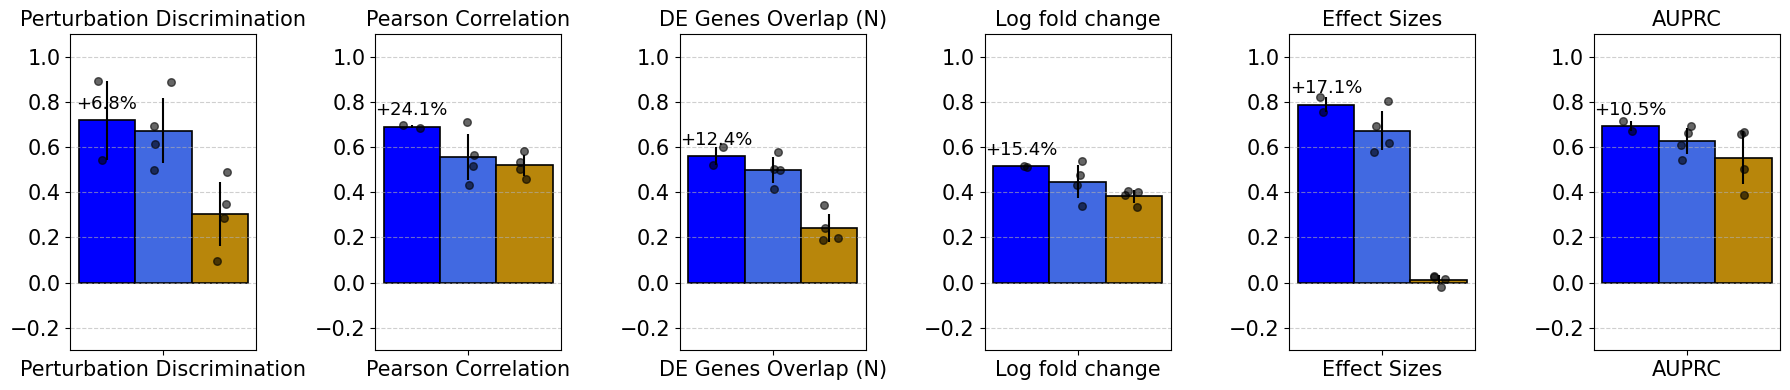

In [4]:
plotter_function(files)

### Jiang

In [21]:
files = {}

files['state-sets'] = glob.glob("/large_storage/ctc/userspace/alishba.imran/state-sets/jiang_proper_vci_pretrain_zeroshot_*/eval_step=80000.ckpt/*_results.csv")
files['sets'] =  glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/jiang_proper_hvg_pretrain_zeroshot_*/eval_step=80000.ckpt/*_results.csv')
files['pert_mean'] = glob.glob("/large_storage/ctc/userspace/alishba.imran/state-sets/jiang_proper_pertmean_zeroshot_*/eval_final.ckpt/*_results.csv")

for k, files_ in files.items():
    files[k] = [f for f in files_ if 'agg' not in f]

In [22]:
files['state-sets'] 

['/large_storage/ctc/userspace/alishba.imran/state-sets/jiang_proper_vci_pretrain_zeroshot_6/eval_step=80000.ckpt/MCF7_TGFB1_results.csv',
 '/large_storage/ctc/userspace/alishba.imran/state-sets/jiang_proper_vci_pretrain_zeroshot_2/eval_step=80000.ckpt/BXPC3_TGFB1_results.csv',
 '/large_storage/ctc/userspace/alishba.imran/state-sets/jiang_proper_vci_pretrain_zeroshot_4/eval_step=80000.ckpt/HT29_TGFB1_results.csv',
 '/large_storage/ctc/userspace/alishba.imran/state-sets/jiang_proper_vci_pretrain_zeroshot_5/eval_step=80000.ckpt/K562_TGFB1_results.csv',
 '/large_storage/ctc/userspace/alishba.imran/state-sets/jiang_proper_vci_pretrain_zeroshot_3/eval_step=80000.ckpt/HAP1_TGFB1_results.csv',
 '/large_storage/ctc/userspace/alishba.imran/state-sets/jiang_proper_vci_pretrain_zeroshot_1/eval_step=80000.ckpt/A549_TGFB1_results.csv']

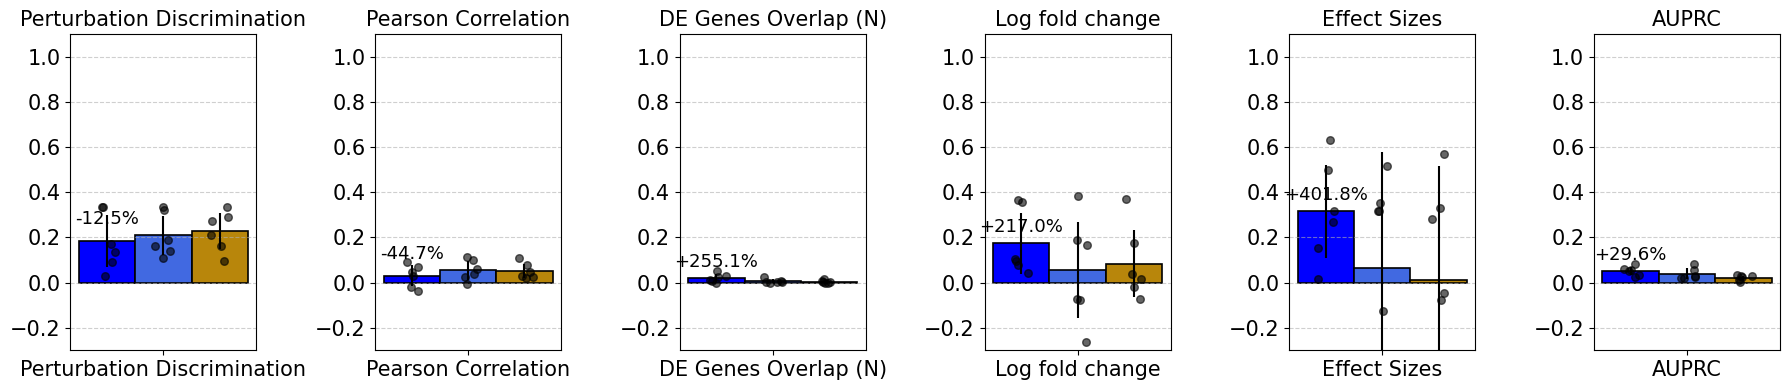

In [23]:
##plotter_function_spearman(files, 'jiang.svg')
plotter_function(files, 'jiang.svg')

### Srivatsan

In [24]:
files = {}

files['state-sets'] = glob.glob("/large_storage/ctc/userspace/alishba.imran/state-sets/sri_vci_zeroshot_*/eval_step=80000.ckpt/*_results.csv")
files['sets'] =  glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/srivatsan_filtered_hvg_pretrain_zeroshot_*/eval_step=80000.ckpt/*_results.csv')
files['pert_mean'] = glob.glob("/large_storage/ctc/userspace/alishba.imran/state-sets/sri_pertmean_zeroshot_*/eval_final.ckpt/*_results.csv")

for k, files_ in files.items():
    files[k] = [f for f in files_ if 'agg' not in f]

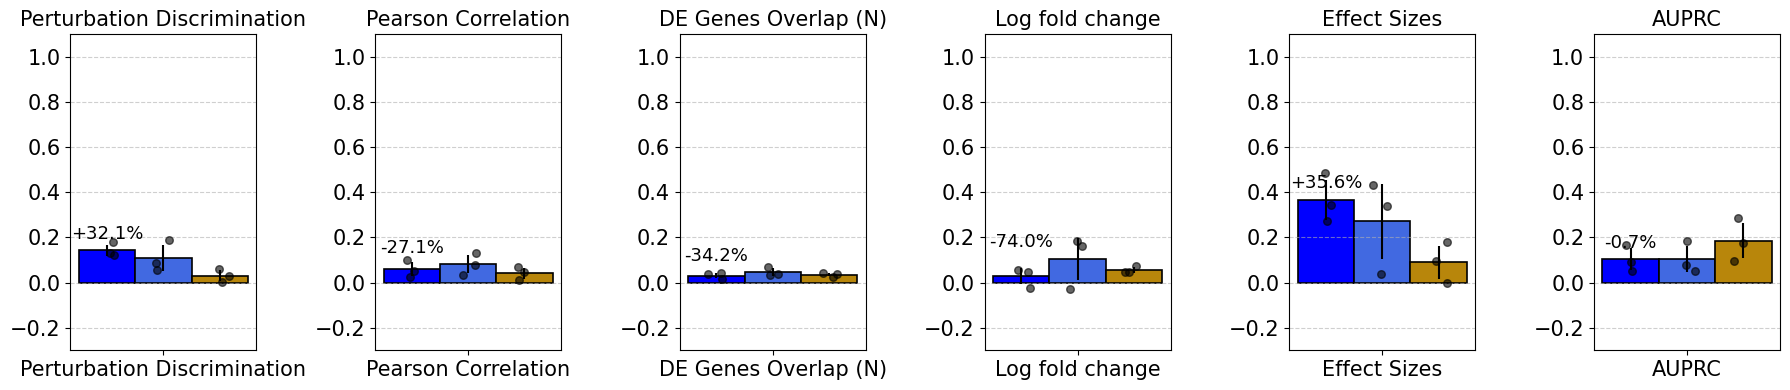

In [25]:

##plotter_function_spearman(files, 'srivatsan.svg')
plotter_function(files, 'srivatsan.svg')

### Replogle

In [26]:
files = {}

files['state-sets'] = glob.glob("/large_storage/ctc/userspace/alishba.imran/state-sets/replogle_proper_vci_pretrain_zeroshot_*/eval_step=80000.ckpt/*_results.csv")
files['sets'] =  glob.glob("/large_storage/ctc/userspace/alishba.imran/state-sets/replogle_proper_hvg_pretrain_zeroshot_*/eval_step=80000.ckpt/*_results.csv")
files['pert_mean'] = glob.glob("/large_storage/ctc/userspace/alishba.imran/state-sets/replogle_proper_pertmean_zeroshot_*/eval_final.ckpt/*_results.csv")

for k, files_ in files.items():
    files[k] = [f for f in files_ if 'agg' not in f]

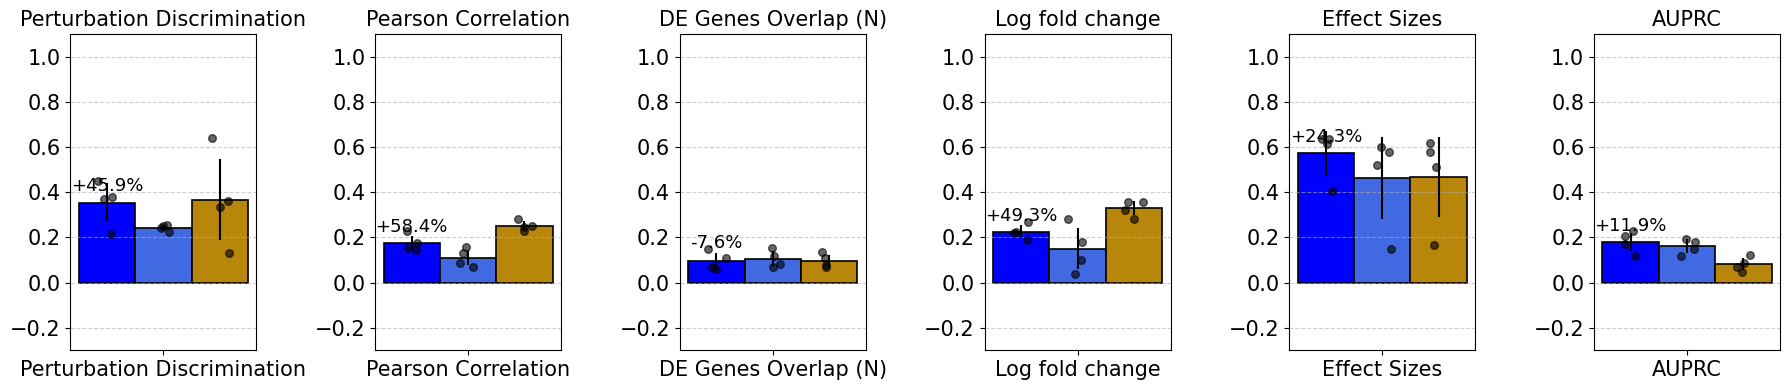

In [27]:
##plotter_function_spearman(files, 'replogle.svg')
plotter_function(files, 'replogle.svg')

### McFaline

In [28]:
files = {}

files['state-sets'] = glob.glob("/large_storage/ctc/userspace/alishba.imran/state-sets/mcfaline_filtered_vci_zeroshot_*/eval_step=80000.ckpt/*_results.csv")
files['sets'] =  glob.glob("/large_storage/ctc/userspace/alishba.imran/state-sets/mcfaline_filtered_hvg_pretrain_zeroshot_*/eval_step=80000.ckpt/*_results.csv")
files['pert_mean'] = glob.glob("/large_storage/ctc/userspace/alishba.imran/state-sets/mcfaline_filtered_pertmean_zeroshot_*/eval_final.ckpt/*_results.csv")

for k, files_ in files.items():
    files[k] = [f for f in files_ if 'agg' not in f]

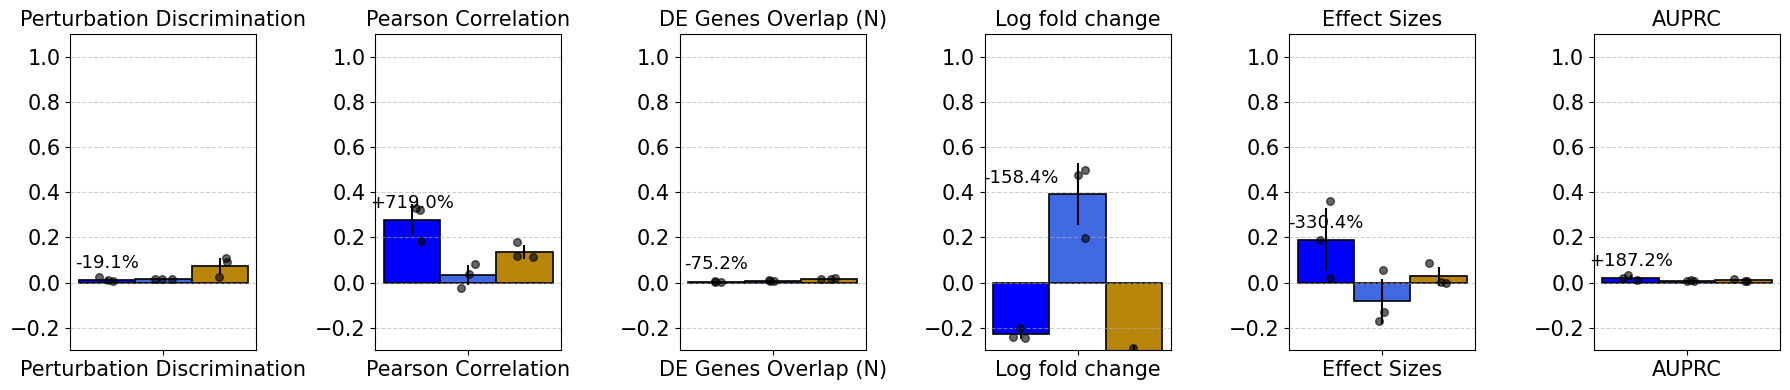

In [29]:
##plotter_function_spearman(files, 'mcfaline.svg')
plotter_function(files, 'mcfaline.svg')

### Parse

In [30]:
files = {}

files['state-sets'] = glob.glob("/large_storage/ctc/userspace/aadduri/preprint_parse/parse_donor_tahoe_best_cs512_2000_state_pretrained_zeroshot/parse_donor_state_2000/eval_step=112000.ckpt/*_results.csv")
files['sets'] =  glob.glob("/large_storage/ctc/userspace/aadduri/preprint_parse/parse_donor_tahoe_best_cs512_2000_hvg_pretrained_zeroshot/parse_donor_tahoe_best_2000/eval_step=112000.ckpt/*_results.csv")
files['pert_mean'] = glob.glob("/large_storage/ctc/userspace/aadduri/preprint_parse/parse_donor_globalsimplesum_cs256_2000_hvg_globalsimplesum_zeroshot/parse_donor_globalsimplesum_2000/eval_final.ckpt/*_results.csv")

for k, files_ in files.items():
    files[k] = [f for f in files_ if 'agg' not in f]

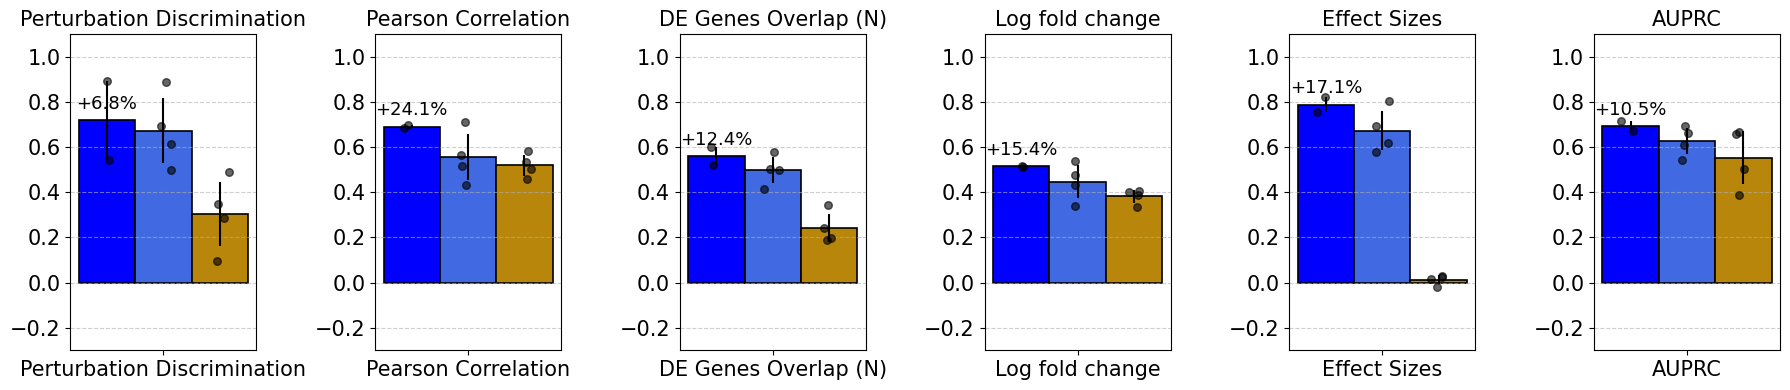

In [31]:
##plotter_function_spearman(files, 'parse.svg')
plotter_function(files, 'parse.svg')

### Pre-training impact

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from plot import plot_bar, plot_bar_scatter, plot_bar_scatter_hor, plot_bar_scatter_hor_embed_compare
import glob
import pandas as pd

from pathlib import Path

def get_metric(files, metric_name, return_type=None):
    try:
        vals = [pd.read_csv(f)[metric_name].mean() for f in files]
    except:
        return np.nan
    if return_type=='mean':
        return np.mean(vals)
    if return_type=='std':
        return np.std(vals)
    else:
        return vals

def mean_sd(values):
    return np.mean(values)

model_key_to_name = {
    'state-sets': 'State-Sets',
    'sets': 'Sets',
    'pert_mean': 'Pert Mean',
    'PerturbMean': 'PerturbMean',
    'cell_mean': 'Cell Type Mean',
    'lrlm': 'Linear',
    'scvi': 'scVI',
    'cpa': 'CPA',
    'scgpt': 'scGPT',
    'ST + HVG': 'ST + HVG',
    'ST + HVG (Pretrained)': 'ST + HVG (Pretrained)',
    'ST + SE': 'ST + SE',
    'ST + SE (Pretrained)': 'ST + SE (Pretrained)'
}



In [13]:
import matplotlib.pyplot as plt

def plotter_function(files, fname='test.svg', keys=[]):

    # ------------------------------------------------------------------
    values_dict = {}
    err_dict = {}
    titles_dict = {}
    outpaths_dict = {}
    groups_dict = {}
    cell_vals_dict = {}
    
    model_names = [model_key_to_name[k] for k in keys]
    
    # helper for NaN-safe transforms
    def safe_apply(arr, fn):
        """Apply fn element-wise, converting NaNs to 0."""
        return [fn(x) if not np.isnan(x) else 0 for x in arr]
    
    # ------------------------------------------------------------------
    # one row per metric: (internal key, display title, output file, metric_name,
    #                     val_transform, err_transform)
    metrics = [
        ('Discrimination',   'Perturbation Discrimination', 'pert_discrim.svg',
         'discrimination_score_l1',
         lambda v: 1 - 2*v, lambda e: 2*e),
    
        ('Correlation',      'Pearson Correlation',         'pearson_corr.svg',
         'pearson_delta',
         lambda v: v,        lambda e: e),
    
        ('DE_Overlap',       'DE Genes Overlap (N)',        'de_overlap.svg',
         'overlap_at_N',
         lambda v: v,        lambda e: e),
    
        ('log fold change',  'Log fold change',             'logFC.svg',
         'de_spearman_lfc_sig',
         lambda v: v,        lambda e: e),
    
        ('Effect Sizes',     'Effect Sizes',                'effect_sizes.svg',
         'de_spearman_sig',
         lambda v: v,        lambda e: e),

        ('AUPRC',     'AUPRC',                'auprc.svg',
         'pr_auc',
         lambda v: v,        lambda e: e),
    ]
    
    # ------------------------------------------------------------------
    # populate the dicts
    for metric_title, disp_title, outpath, metric_name, v_tf, e_tf in metrics:
        titles_dict[metric_title]  = disp_title
        outpaths_dict[metric_title] = outpath
        groups_dict[metric_title]   = [disp_title]
    
        # raw means / stds
        raw_vals = [get_metric(files[k], metric_name, 'mean') for k in keys]
        raw_errs = [get_metric(files[k], metric_name, 'std')  for k in keys]
        raw_cell_vals = [get_metric(files[k], metric_name)  for k in keys]
    
        # transform & NaN-guard
        vals = safe_apply(raw_vals, v_tf)
        errs = safe_apply(raw_errs, e_tf)
        raw_cell_vals = [safe_apply(cv, v_tf) for cv in raw_cell_vals]
        
    
        # shape as (1, N) for downstream plotting code
        values_dict[metric_title] = np.expand_dims(vals, 1).T
        err_dict[metric_title]    = np.expand_dims(errs, 1).T
        cell_vals_dict[metric_title]    = raw_cell_vals

    metric_titles = list(values_dict.keys())
    n = len(metric_titles)
    fig, axes = plt.subplots(1, n, figsize=(3 * n, 4), squeeze=False)
    
    for i, metric_title in enumerate(metric_titles):
        ax = axes[0, i]
        plot_bar_scatter_hor_embed_compare(
            values=values_dict[metric_title],
            groups=groups_dict[metric_title],
            raw_data=cell_vals_dict[metric_title],
            title=titles_dict[metric_title],
            errors=err_dict[metric_title],
            models=keys,
            ax=ax,
            legend=None,
            fontsize=15
        )
    
        # if this is the spearman‐metric plot, set the lower y‐limit to -0.3
        ##if metric_title == 'log fold change' or metric_title == 'Effect Sizes':
            # keep the auto‐computed upper bound (e.g. ~1.1) but drop the bottom
        upper = ax.get_ylim()[1]
        ax.set_ylim(-0.3, upper)
    
    plt.tight_layout()
    fig.savefig(fname, dpi=300)
    plt.show()


import matplotlib.pyplot as plt

def plotter_function_spearman(files, fname='test.svg', keys=[]):

    # ------------------------------------------------------------------
    values_dict = {}
    err_dict = {}
    titles_dict = {}
    outpaths_dict = {}
    groups_dict = {}
    cell_vals_dict = {}
    
    model_names = [model_key_to_name[k] for k in keys]
    
    # helper for NaN-safe transforms
    def safe_apply(arr, fn):
        """Apply fn element-wise, converting NaNs to 0."""
        return [fn(x) if not np.isnan(x) else 0 for x in arr]
    
    # ------------------------------------------------------------------
    # one row per metric: (internal key, display title, output file, metric_name,
    #                     val_transform, err_transform)
    metrics = [
        ('Effect Sizes',     'Effect Sizes',                'effect_sizes.svg',
         'de_spearman_sig',
         lambda v: v,        lambda e: e),
    ]
    
    # ------------------------------------------------------------------
    # populate the dicts
    for metric_title, disp_title, outpath, metric_name, v_tf, e_tf in metrics:
        titles_dict[metric_title]  = disp_title
        outpaths_dict[metric_title] = outpath
        groups_dict[metric_title]   = [disp_title]
    
        # raw means / stds
        raw_vals = [get_metric(files[k], metric_name, 'mean') for k in keys]
        raw_errs = [get_metric(files[k], metric_name, 'std')  for k in keys]
        raw_cell_vals = [get_metric(files[k], metric_name)  for k in keys]
    
        # transform & NaN-guard
        vals = safe_apply(raw_vals, v_tf)
        errs = safe_apply(raw_errs, e_tf)
        raw_cell_vals = [safe_apply(cv, v_tf) for cv in raw_cell_vals]
        
    
        # shape as (1, N) for downstream plotting code
        values_dict[metric_title] = np.expand_dims(vals, 1).T
        err_dict[metric_title]    = np.expand_dims(errs, 1).T
        cell_vals_dict[metric_title]    = raw_cell_vals

    metric_titles = list(values_dict.keys())
    n = len(metric_titles)
    fig, axes = plt.subplots(1, n, figsize=(3 * n, 4), squeeze=False)
    
    for i, metric_title in enumerate(metric_titles):
        ax = axes[0, i]
        plot_bar_scatter_hor_embed_compare(
            values=values_dict[metric_title],
            groups=groups_dict[metric_title],
            raw_data=cell_vals_dict[metric_title],
            title=titles_dict[metric_title],
            errors=err_dict[metric_title],
            models=keys,
            ax=ax,
            legend=None,
            fontsize=15
        )
    
        # if this is the spearman‐metric plot, set the lower y‐limit to -0.3
        ##if metric_title == 'log fold change' or metric_title == 'Effect Sizes':
            # keep the auto‐computed upper bound (e.g. ~1.1) but drop the bottom
        upper = ax.get_ylim()[1]
        ax.set_ylim(-0.6, upper)
    
    plt.tight_layout()
    fig.savefig(fname, dpi=300)
    plt.show()



### Jiang

In [14]:
### Jiang

keys        = ['PerturbMean', 'ST + HVG', 'ST + HVG (Pretrained)', 'ST + SE', 'ST + SE (Pretrained)']
import glob

files = {}
files['PerturbMean'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/jiang_proper_pertmean_zeroshot_*/eval_final.ckpt/*_results.csv')
files['ST + HVG'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/jiang_proper_hvg_zeroshot_*/eval_step=80000.ckpt/*_results.csv')
files['ST + HVG (Pretrained)'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/jiang_proper_hvg_pretrain_zeroshot_*/eval_step=80000.ckpt/*_results.csv')
files['ST + SE'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/jiang_proper_vci_zeroshot_*/eval_step=80000.ckpt/*_results.csv')
files['ST + SE (Pretrained)'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/jiang_proper_vci_pretrain_zeroshot_*/eval_step=80000.ckpt/*_results.csv')

for k, files_ in files.items():
    files[k] = [f for f in files_ if 'agg' not in f]

In [22]:
0.28/0.03*100

933.3333333333334

In [18]:
np.mean(get_metric(files['ST + SE (Pretrained)'], 'de_spearman_sig'))

0.31498565449799015

In [19]:
np.mean(get_metric(files['ST + SE'], 'de_spearman_sig'))

0.033020339497149005

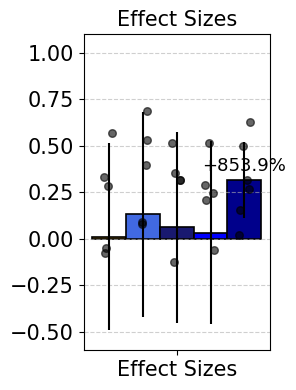

In [15]:
plotter_function_spearman(files, 'jiang.svg', keys)

### Replogle

In [5]:
files = {}
files['PerturbMean'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/replogle_proper_pertmean_zeroshot_*/eval_final.ckpt/*_results.csv')
files['ST + HVG'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/replogle_proper_hvg_zeroshot_*/eval_step=80000.ckpt/*_results.csv')
files['ST + HVG (Pretrained)'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/replogle_proper_hvg_pretrain_zeroshot_*/eval_step=80000.ckpt/*_results.csv')
files['ST + SE'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/replogle_proper_vci_zeroshot_*/eval_step=80000.ckpt/*_results.csv')
files['ST + SE (Pretrained)'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/replogle_proper_vci_pretrain_zeroshot_*/eval_step=80000.ckpt/*_results.csv')

for k, files_ in files.items():
    files[k] = [f for f in files_ if 'agg' not in f]

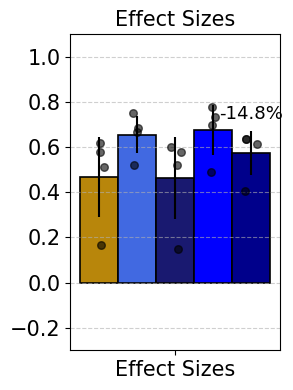

In [6]:
plotter_function_spearman(files, 'replogle.svg', keys)

### Srivatsan

In [7]:
import glob

files = {}
files['PerturbMean'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/sri_pertmean_zeroshot_*/eval_final.ckpt/*_results.csv')
files['ST + HVG'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/sri_hvg_zeroshot_*/eval_step=80000.ckpt/*_results.csv')
files['ST + HVG (Pretrained)'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/srivatsan_filtered_hvg_pretrain_zeroshot_*/eval_step=80000.ckpt/*_results.csv')
files['ST + SE'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/sri_vcip_zeroshot_*/eval_step=80000.ckpt/*_results.csv')
files['ST + SE (Pretrained)'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/sri_vci_zeroshot_*/eval_step=80000.ckpt/*_results.csv')

for k, files_ in files.items():
    files[k] = [f for f in files_ if 'agg' not in f]

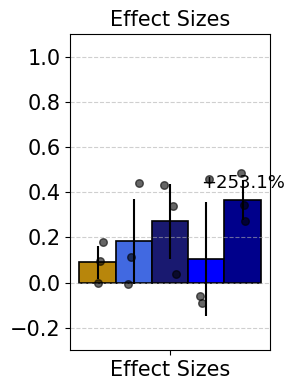

In [8]:
plotter_function_spearman(files, 'srivatsan.svg', keys)

### McFaline

In [9]:
import glob

files = {}
files['PerturbMean'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/mcfaline_filtered_pertmean_zeroshot_*/eval_final.ckpt/*_results.csv')
files['ST + HVG'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/mcfaline_filtered_hvg_zeroshot_*/eval_step=80000.ckpt/*_results.csv')
files['ST + HVG (Pretrained)'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/mcfaline_filtered_hvg_pretrain_zeroshot_*/eval_step=80000.ckpt/*_results.csv')
files['ST + SE'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/mcfaline_filtered_vcip_zeroshot_*/eval_step=80000.ckpt/*_results.csv')
files['ST + SE (Pretrained)'] = glob.glob('/large_storage/ctc/userspace/alishba.imran/state-sets/mcfaline_filtered_vci_zeroshot_*/eval_step=80000.ckpt/*_results.csv')

for k, files_ in files.items():
    files[k] = [f for f in files_ if 'agg' not in f]

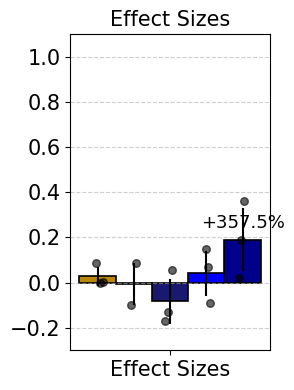

In [10]:
plotter_function_spearman(files, 'mcfaline.svg', keys)

### Parse

In [11]:
import glob

files = {}
files['PerturbMean'] = glob.glob('/large_storage/ctc/userspace/aadduri/preprint_parse/parse_donor_globalsimplesum_cs256_2000_hvg_globalsimplesum_zeroshot/parse_donor_globalsimplesum_2000/eval_final.ckpt/*_results.csv')
files['ST + HVG'] = glob.glob('/large_storage/ctc/userspace/aadduri/preprint_parse/parse_donor_tahoe_best_cs512_2000_hvg_zeroshot/parse_donor_tahoe_best_2000/eval_step=112000.ckpt/*_results.csv')
files['ST + HVG (Pretrained)'] = glob.glob('/large_storage/ctc/userspace/aadduri/preprint_parse/parse_donor_tahoe_best_cs512_2000_hvg_pretrained_zeroshot/parse_donor_tahoe_best_2000/eval_step=112000.ckpt/*_results.csv')
files['ST + SE'] = glob.glob('/large_storage/ctc/userspace/aadduri/preprint_parse/parse_donor_tahoe_best_cs512_2000_state_zeroshot/parse_donor_state_2000/eval_step=112000.ckpt/*_results.csv')
files['ST + SE (Pretrained)'] = glob.glob('/large_storage/ctc/userspace/aadduri/preprint_parse/parse_donor_tahoe_best_cs512_2000_state_pretrained_zeroshot/parse_donor_state_2000/eval_step=112000.ckpt/*_results.csv')

for k, files_ in files.items():
    files[k] = [f for f in files_ if 'agg' not in f]

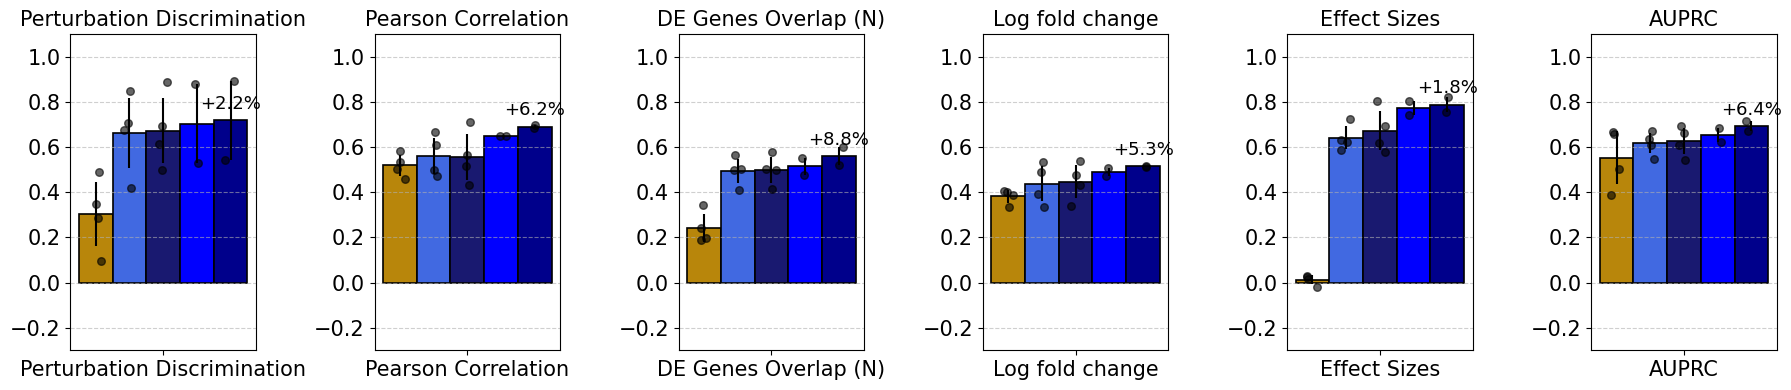

In [12]:
plotter_function(files, 'parse.svg', keys)